# Machine Learning 2
In this exercise, you will demonstrate your learning of prediction, including regression and classification, using the [scikit-learn library](https://scikit-learn.org/stable/index.html). Note that scikit-learn is included in the Anaconda distribution, so you should not need to install anything new to use it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Question 1
Below we import the `tips` dataset containing information from several meals in a particular restaurant. We preview the first few rows.

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We are interested in modeling `tip` as a function of `total_bill` and `size`. Use scikit-learn to perform linear regression to model `tip` as a function of `total_bill` and `size`. Once you have fit the model, obtain the model predictions and compare them to the real `tip`. Compute both the MSE (mean squared error) and the r^2 score (the square of Pearson's correlation coefficient). Report the MSE and r^2 score.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LinearRegression model, i.e., you do not need to pass any parameters to the constructor.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x = tips[["total_bill", "size"]]
y = tips["tip"]
model1 = LinearRegression().fit(x, y)
# (y_true, y_predicted)
mse1 = mean_squared_error(y, model1.predict(x))
r_squared1 = r2_score(y, model1.predict(x))

In [4]:
print("MSE: ", mse1)
print("r^2: ", r_squared1)

MSE:  1.014564905610028
r^2:  0.46786930879612587


### Question 2
Below we import and preview the `penguins` dataset. We have previously modeled the numerical `flipper_length_mm` feature. In this question, we will model the categorical `species` feature.

In [5]:
penguins = sns.load_dataset("penguins").dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


To begin, we hold out 70% of the data randomly as a test set.

In [6]:
from sklearn.model_selection import train_test_split

data = penguins.drop(columns=["species"])
target = penguins["species"]
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.7, 
                                                                    random_state=216)

Now, create and fit a logistic regression model to predict the `species` of a penguin using all of the other features in the dataset.  Note that two of the features, `island` and `sex` are categorical. Use a one hot encoding to encode these categorical features in your model and combine them with the numerical features. You should fit your model only on `train_data` and `train_target`.

Once you have fit your logistic regression model, make predictions for `test_data` and then compute and report the `accuracy_score` of your predictions versus `test_target`. Also plot the confusion matrix for your predictions. Which `species` is most difficult for our model to classify? That is, for which `species` of penguin does our model make the most errors in its predictions on the test data?

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- If you use the default LogisticRegression model, you may get a warning message about convergence during fitting. We recommend that you set the parameter `max_iter=1000` when calling the constructor for your model (i.e., `LogisticRegression(max_iter=1000)`. This will allow the optimization code for the model to converge.

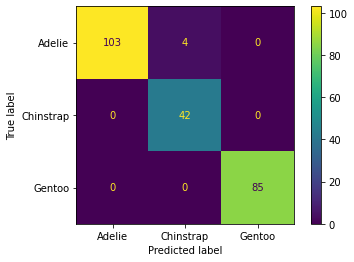

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt # just to format confusion matrix

drop_enc = OneHotEncoder().fit(train_data[["island","sex"]])
new_enc = pd.DataFrame(drop_enc.transform(train_data[["island","sex"]]).toarray(), columns=["Torgersen", "Dream", "Biscoe", "Female", "Male"])
new_df = pd.concat([train_data.reset_index(drop=True), new_enc], axis=1)

x = new_df[["bill_length_mm", "flipper_length_mm", "bill_depth_mm", "body_mass_g", "Torgersen", "Dream", "Biscoe", "Female", "Male"]]
y = train_target
model2 = LogisticRegression(max_iter=1000).fit(x, y)

drop_enc2 = OneHotEncoder().fit(test_data[["island", "sex"]])
new_enc2 = pd.DataFrame(drop_enc2.transform(test_data[["island","sex"]]).toarray(), columns=["Torgersen", "Dream", "Biscoe", "Female", "Male"])
new_df2 = pd.concat([test_data.reset_index(drop=True), new_enc2], axis=1)

x2 = new_df2[["bill_length_mm", "flipper_length_mm", "bill_depth_mm", "body_mass_g", "Torgersen", "Dream", "Biscoe", "Female", "Male"]]
y2 = test_target
plot_confusion_matrix(model2, x2, y2)  
plt.grid(False)

In [8]:
print("Accuracy Score: ", accuracy_score(model2.predict(x2), y2))

Accuracy Score:  0.9829059829059829


### Answer 2
Adelie is the most difficult for our model to classify since there are 4 misclassifications of Adelie as Chinstrap and there are no classifications for the other two species. 

### Question 3
In addition to natural language processing, machine learning techniques for preditive modeling can be very effective for analyzing raw image data. In this question, we consider the task of modeling images of handwritten digits. We pose this as a classification task: We want to predict the digit (0, 1, 2, ..., 9) as a function of an 8 by 8 pixel grayscale image of a digit.

To begin, we import and preview the data below. `data` has 64 features, each of which is an integer between 0 and 15 corresponding to a particular pixel intensity value for one of the 64 pixels in the 8 by 8 image. `target` contains the actual digits corresponding to each particular image.

The first image corresponds to digit:  0 

First image with pixels flattened out: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

First image rearranged to be 8 x 8: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

Visualizing first several images:


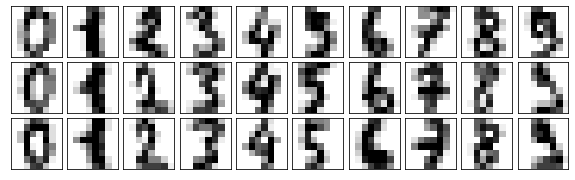

In [10]:
import matplotlib.pyplot as plt

# Importing data
from sklearn.datasets import load_digits
digits = load_digits()
data = digits["data"]
target = digits["target"]

# Previewing data
print("The first image corresponds to digit: ", target[0], "\n")
print("First image with pixels flattened out: \n", data[0], "\n")
print("First image rearranged to be 8 x 8: \n", data[0].reshape((8,8)), "\n")
print("Visualizing first several images:")

# Visualizing digits
fig, axes = plt.subplots(3, 10, figsize=(10, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')

We first split the data into training and test sets as usual.

In [11]:
# Run but do not modify this code

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)

Now, use a k-nearest neighbors classifier for your model that predicts digit given an image. We import the relevant `KNeighborsClassifier` for you below. Recall that an important hyperparameter of a k-nearest neighbor model is k, or the `n_neighbors` parameter to the `KNeighborsClassifier()` constructor. 

Use 5-fold cross validation to search for the best value of `n_neighbors` in validation on the training set from among possible values between 1 and 30. You can either do so using `cross_validate` to check each possible setting directly, or you can use a `GridSearchCV` to perform the search automatically during fitting. Report the optimal value of `n_neighbors`.

Finally, when you have fit your model with the optimal `n_neighbors` value on the training data, make predictions for the test data. Compute and report the `accuracy_score` of your model in testing.  

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Write your code for question 4 here
trials = {"n_neighbors": range(1, 20)}
knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = trials)
knn.fit(train_data, train_target)
print(knn.best_params_)

{'n_neighbors': 3}


In [13]:
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(train_data, train_target)
print("Accuracy Score: ", accuracy_score(model3.predict(test_data), test_target))

Accuracy Score:  0.987037037037037
